In [51]:
import pandas as ps
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as pylot
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

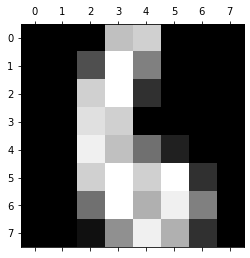

In [8]:
pylot.gray()
pylot.matshow(digits.images[6])

In [11]:
df = ps.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [18]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [20]:
x = df.drop('target',axis='columns')
y=df.target

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [26]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(x_test,y_test)

0.9844444444444445

In [44]:
clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[3,1,2,4,5,10],'weights':['uniform','distance']})
clf.fit(digits.data,digits.target) 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 1, 2, 4, 5, 10],
                         'weights': ['uniform', 'distance']})

In [45]:
clf.best_score_

0.9671742494583719

In [47]:
clf.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [49]:
clf.predict(x_test)

array([7, 0, 7, 8, 4, 5, 1, 0, 5, 5, 4, 5, 1, 7, 9, 5, 3, 5, 0, 2, 2, 1,
       8, 8, 1, 4, 5, 8, 8, 5, 9, 5, 2, 1, 6, 2, 9, 8, 8, 6, 9, 3, 2, 4,
       1, 0, 5, 0, 7, 8, 6, 6, 1, 7, 3, 3, 1, 6, 6, 3, 1, 0, 2, 9, 3, 9,
       2, 6, 6, 8, 5, 6, 8, 3, 4, 4, 5, 7, 4, 0, 1, 5, 4, 4, 4, 9, 0, 8,
       6, 5, 5, 7, 1, 0, 7, 9, 6, 7, 8, 8, 3, 6, 7, 6, 2, 8, 5, 9, 0, 8,
       8, 9, 3, 6, 5, 2, 3, 4, 5, 3, 4, 1, 3, 7, 2, 0, 4, 5, 4, 5, 1, 7,
       2, 5, 9, 7, 1, 1, 9, 0, 4, 4, 7, 5, 8, 6, 1, 8, 8, 2, 8, 2, 0, 0,
       8, 6, 1, 1, 0, 6, 5, 9, 8, 0, 8, 5, 3, 5, 9, 8, 6, 6, 7, 2, 1, 2,
       2, 8, 4, 4, 8, 0, 6, 7, 2, 0, 8, 5, 4, 8, 6, 3, 9, 1, 3, 8, 1, 5,
       8, 9, 2, 2, 1, 0, 5, 9, 0, 2, 4, 0, 4, 4, 9, 2, 3, 6, 4, 9, 9, 9,
       5, 9, 7, 5, 2, 4, 1, 3, 8, 3, 7, 7, 0, 3, 5, 3, 8, 2, 2, 7, 8, 2,
       0, 7, 2, 0, 9, 6, 3, 9, 1, 9, 1, 8, 0, 8, 8, 8, 4, 3, 9, 7, 3, 5,
       3, 5, 7, 4, 1, 5, 4, 6, 3, 3, 9, 6, 6, 4, 3, 6, 1, 8, 2, 3, 4, 4,
       2, 6, 8, 7, 6, 2, 8, 1, 4, 3, 9, 6, 5, 2, 1,

In [61]:
ypred = knn.predict(x_test)
cm = confusion_matrix(y_test,ypred)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 46,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 46,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 54,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0, 42]], dtype=int64)

Text(69.0, 0.5, 'Truth')

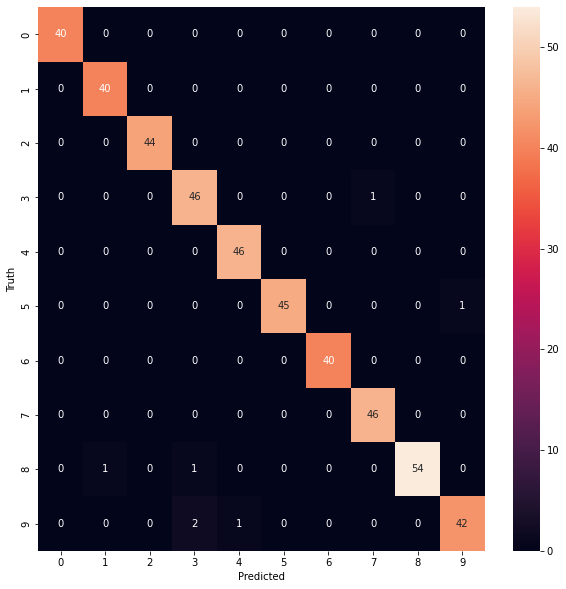

In [62]:
import seaborn as sn
pylot.figure(figsize=(10,10))
sn.heatmap(cm,annot=True)
pylot.xlabel('Predicted')
pylot.ylabel("Truth")

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        44
           3       0.94      0.98      0.96        47
           4       0.98      1.00      0.99        46
           5       1.00      0.98      0.99        46
           6       1.00      1.00      1.00        40
           7       0.98      1.00      0.99        46
           8       1.00      0.96      0.98        56
           9       0.98      0.93      0.95        45

    accuracy                           0.98       450
   macro avg       0.98      0.99      0.98       450
weighted avg       0.98      0.98      0.98       450

